#### Line plot

In [ ]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ad.csv to ad (2).csv


In [ ]:
series = read_csv('ad.csv')
series


,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


#### Histogram and Density Plots

In [ ]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot

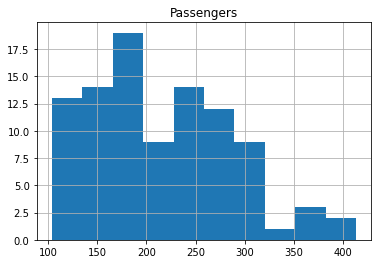

In [ ]:
series1 = read_csv('ad.csv', header=0, index_col=0,parse_dates=True)
series1.hist()
pyplot.show()

In [ ]:
series1.columns

Index(['Passengers'], dtype='object')

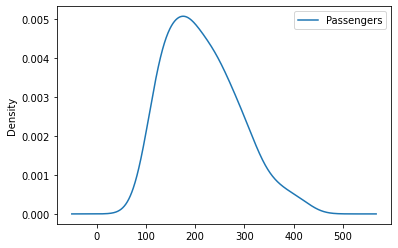

In [ ]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series1 = read_csv('ad.csv', header=0, index_col=0,parse_dates=True)
series1.plot(kind='kde')
pyplot.show()

#### Box and Whisker Plots by Interval

In [ ]:
import pandas as pd
series["Month"]=pd.to_datetime(series["Month"], format='%b-%y')

In [ ]:
series.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = series.groupby(Grouper(key='Month',freq='Y')).mean()
years = DataFrame()
years=groups

In [ ]:
years.shape

(8, 1)

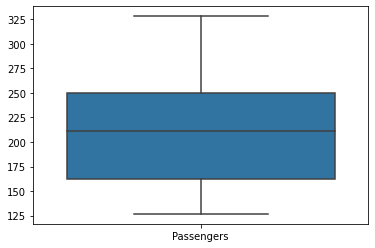

In [ ]:
import seaborn as sns
sns.boxplot(data=years)

In [ ]:
series.columns

Index(['Month', 'Passengers'], dtype='object')

#### Lag plot

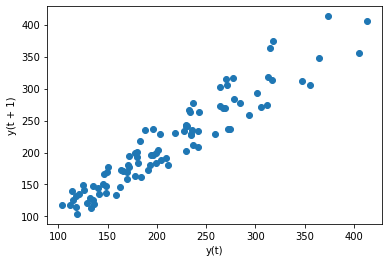

In [ ]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series1 = read_csv('ad.csv', header=0, index_col=0,parse_dates=True)
lag_plot(series1)
pyplot.show()

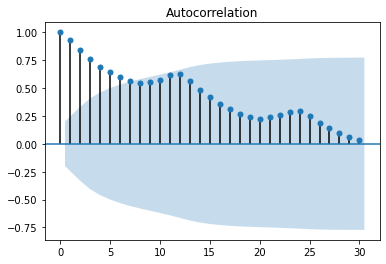

In [ ]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series1 = read_csv('ad.csv', header=0, index_col=0,parse_dates=True)
plot_acf(series1,lags=30)
pyplot.show()

In [ ]:
series1.shape

(96, 1)

In [ ]:
upsampled = groups.resample('M').mean()
print(upsampled)

            Passengers
Month                 
1995-12-31  126.666667
1996-01-31         NaN
1996-02-29         NaN
1996-03-31         NaN
1996-04-30         NaN
...                ...
2002-08-31         NaN
2002-09-30         NaN
2002-10-31         NaN
2002-11-30         NaN
2002-12-31  328.250000

[85 rows x 1 columns]


##### interpolate the missing value

            Passengers
Month                 
1995-12-31  126.666667
1996-01-31  127.750000
1996-02-29  128.833333
1996-03-31  129.916667
1996-04-30  131.000000
1996-05-31  132.083333
1996-06-30  133.166667
1996-07-31  134.250000
1996-08-31  135.333333
1996-09-30  136.416667
1996-10-31  137.500000
1996-11-30  138.583333
1996-12-31  139.666667
1997-01-31  142.208333
1997-02-28  144.750000
1997-03-31  147.291667
1997-04-30  149.833333
1997-05-31  152.375000
1997-06-30  154.916667
1997-07-31  157.458333
1997-08-31  160.000000
1997-09-30  162.541667
1997-10-31  165.083333
1997-11-30  167.625000
1997-12-31  170.166667
1998-01-31  172.402778
1998-02-28  174.638889
1998-03-31  176.875000
1998-04-30  179.111111
1998-05-31  181.347222
1998-06-30  183.583333
1998-07-31  185.819444


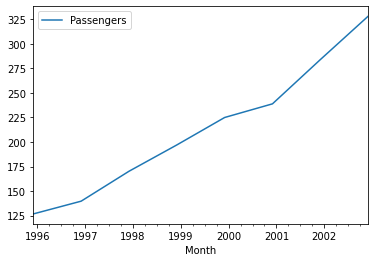

In [ ]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

#### Downsampling Data

In [ ]:
# downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
resample = groups.resample('Q')
quarterly_mean_sales = resample.mean()

In [ ]:
quarterly_mean_sales.head()

,Passengers
Month,
1995-12-31,126.666667
1996-03-31,NaN
1996-06-30,NaN
1996-09-30,NaN
1996-12-31,139.666667


# Tranformations

In [ ]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
series.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

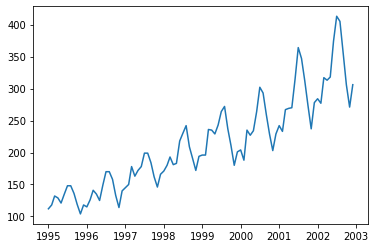

In [ ]:
# line plot
pyplot.subplot()
pyplot.plot('Month','Passengers',data=series)


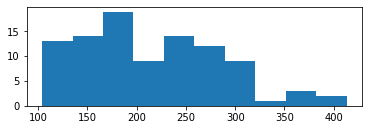

In [ ]:
# histogram
pyplot.subplot(212)
pyplot.hist('Passengers',data=series)
pyplot.show()

#### Square Root Transform

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [ ]:
series

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


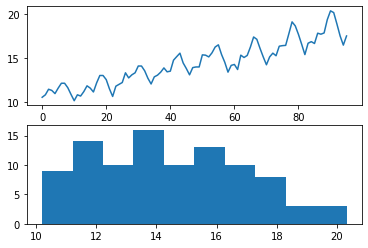

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(sqrt(series["Passengers"]))
# histogram
pyplot.subplot(212)
pyplot.hist(sqrt(series["Passengers"]))
pyplot.show()

#### Log Transform

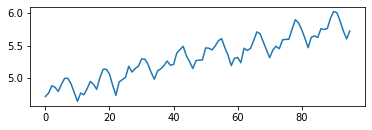

In [ ]:
from numpy import log


# line plot
pyplot.subplot(211)
pyplot.plot(log(series['Passengers']))



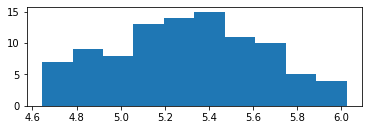

In [ ]:
pyplot.subplot(212)
pyplot.hist(log(series['Passengers']))
pyplot.show()

            Passengers
Month                 
1995-12-31  126.666667
1996-03-31         NaN
1996-06-30         NaN
1996-09-30         NaN
1996-12-31  139.666667


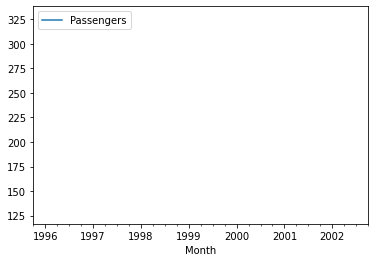

In [ ]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

Forecasting - Data driven

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

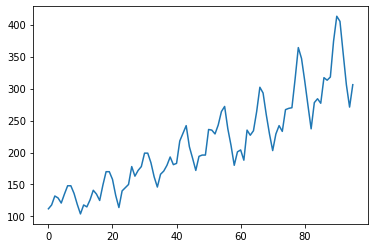

In [ ]:
series.Passengers.plot()



##Splitting data

In [ ]:
series.shape

(96, 2)

In [ ]:
Train = series.head(65)
Test = series.tail(31)

# Moving Average 

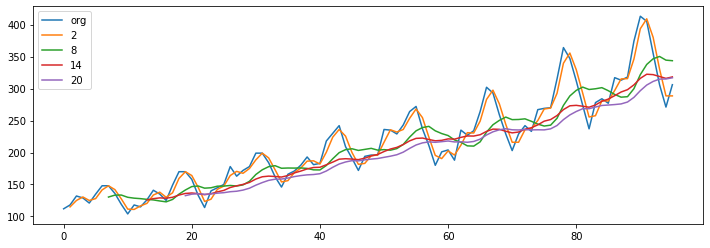

In [ ]:
plt.figure(figsize=(12,4))
series.Passengers.plot(label="org")
for i in range(2,24,6):
    series["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


In [ ]:
series.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


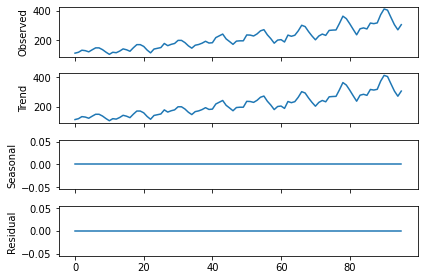

In [ ]:
decompose_ts_add = seasonal_decompose(series.Passengers,freq = True)
decompose_ts_add.plot()
plt.show()


# ACF plots and PACF plots


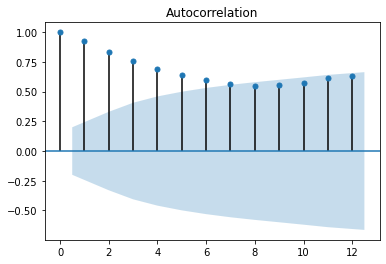

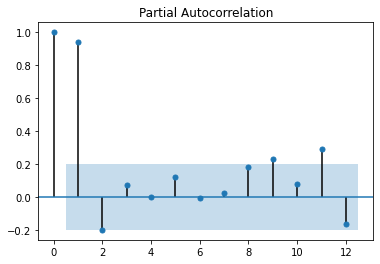

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(series.Passengers,lags=12)
tsa_plots.plot_pacf(series.Passengers,lags=12)
plt.show()


Evaluation Metric MAPE

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [ ]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

23.527467087914474

### Holt method 

In [ ]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

11.233645615577634

Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


10.314537759525916

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

11.569752242093626

## Final Model by combining train and test

In [ ]:
hwe_model_add_add = ExponentialSmoothing(series["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
hwe_model_add_add.forecast(12)

96     320.924021
97     313.638039
98     352.925020
99     350.350301
100    356.060923
101    408.899129
102    446.143114
103    433.358026
104    382.762460
105    336.170254
106    303.315050
107    349.662471
dtype: float64

Forecasting_Model based methods

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ad.csv to ad (1).csv


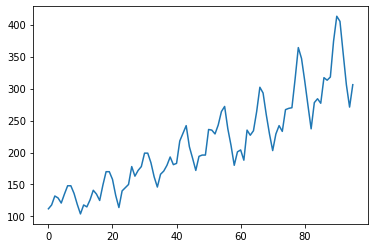

In [ ]:
sermod=read_csv('ad.csv')
sermod.Passengers.plot()

In [ ]:
sermod.shape

(96, 2)

In [ ]:


sermod['t'] = sermod.index +1


In [ ]:
sermod

,Month,Passengers,t
0,Jan-95,112,1
1,Feb-95,118,2
2,Mar-95,132,3
3,Apr-95,129,4
4,May-95,121,5
...,...,...,...
91,Aug-02,405,92
92,Sep-02,355,93
93,Oct-02,306,94
94,Nov-02,271,95


In [ ]:
sermod['log(Passengers)']=np.log(sermod.iloc[:,1])

In [ ]:
sermod['t-square']=sermod.iloc[:,2]*sermod.iloc[:,2]

In [ ]:
sermod

,Month,Passengers,t,log(Passengers),t-square
0,Jan-95,112,1,4.718499,1
1,Feb-95,118,2,4.770685,4
2,Mar-95,132,3,4.882802,9
3,Apr-95,129,4,4.859812,16
4,May-95,121,5,4.795791,25
...,...,...,...,...,...
91,Aug-02,405,92,6.003887,8464
92,Sep-02,355,93,5.872118,8649
93,Oct-02,306,94,5.723585,8836
94,Nov-02,271,95,5.602119,9025


In [ ]:
sermod["Date"] = pd.to_datetime(sermod.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

sermod["month"] = sermod.Date.dt.strftime("%b") # month extraction
sermod["year"] = sermod.Date.dt.strftime("%Y") # year extraction



In [ ]:
sermod

,Month,Passengers,t,log(Passengers),t-square,Date,month,year
0,Jan-95,112,1,4.718499,1,1995-01-01,Jan,1995
1,Feb-95,118,2,4.770685,4,1995-02-01,Feb,1995
2,Mar-95,132,3,4.882802,9,1995-03-01,Mar,1995
3,Apr-95,129,4,4.859812,16,1995-04-01,Apr,1995
4,May-95,121,5,4.795791,25,1995-05-01,May,1995
...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,6.003887,8464,2002-08-01,Aug,2002
92,Sep-02,355,93,5.872118,8649,2002-09-01,Sep,2002
93,Oct-02,306,94,5.723585,8836,2002-10-01,Oct,2002
94,Nov-02,271,95,5.602119,9025,2002-11-01,Nov,2002


In [ ]:
enc_data=pd.get_dummies(sermod['month'])

In [ ]:
enc_data


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
seriesmodel=sermod.iloc[:,0:].join(enc_data)

In [ ]:
seriesmodel.shape

(96, 20)

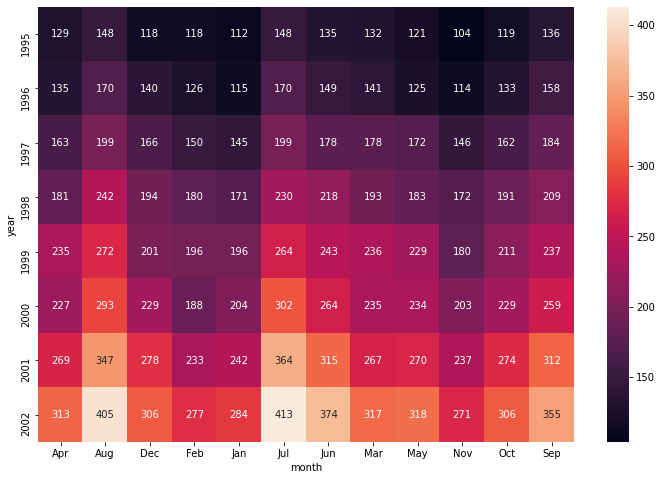

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=seriesmodel,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


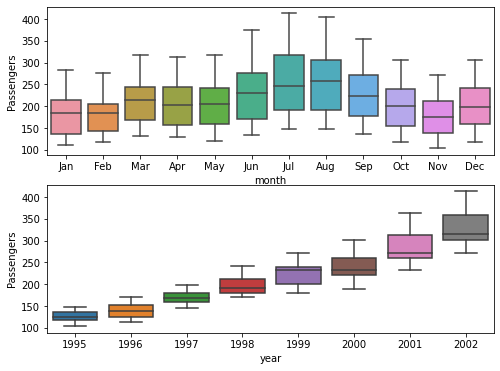

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=seriesmodel)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=seriesmodel)

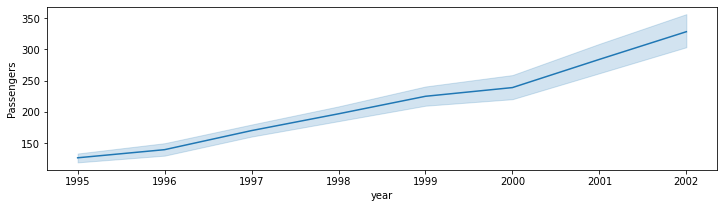

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=seriesmodel)

Splitting data

In [ ]:
Train = seriesmodel.head(65)
Test = seriesmodel.tail(35)

In [ ]:
Train

,Month,Passengers,t,log(Passengers),t-square,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1,4.718499,1,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,4.770685,4,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,4.882802,9,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,4.859812,16,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,4.795791,25,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Jan-00,204,61,5.318120,3721,2000-01-01,Jan,2000,0,0,0,0,1,0,0,0,0,0,0,0
61,Feb-00,188,62,5.236442,3844,2000-02-01,Feb,2000,0,0,0,1,0,0,0,0,0,0,0,0
62,Mar-00,235,63,5.459586,3969,2000-03-01,Mar,2000,0,0,0,0,0,0,0,1,0,0,0,0
63,Apr-00,227,64,5.424950,4096,2000-04-01,Apr,2000,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.215057140105166

In [ ]:
#Exponential

Exp = smf.ols('log(Passengers)~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


39.961766974369944

In [ ]:
#Quadratic 

Quad = smf.ols('Passengers~t+t-square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t-square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.215057140105166

In [ ]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

118.35299166020533

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t-square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t-square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

33.43444606553943

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log(Passengers)~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

122.2416178035053

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log(Passengers)~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

13.83993535621583

In [ ]:
pred=np.exp(pred_Mult_add_sea)

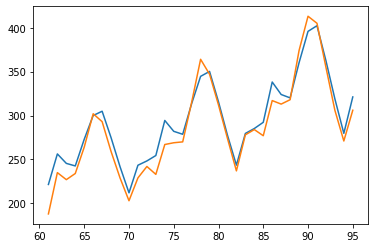

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
pred.plot()
Test["Passengers"].plot()
pyplot.show()


In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.839935
4,rmse_add_sea_quad,33.434446
1,rmse_Exp,39.961767
0,rmse_linear,48.215057
2,rmse_Quad,48.215057
3,rmse_add_sea,118.352992
5,rmse_Mult_sea,122.241618


Predict for new time period

In [ ]:
from google.colab import files
up=files.upload()

Saving Predict_new.csv to Predict_new.csv


In [ ]:
predict_data = pd.read_csv("Predict_new.csv")

In [ ]:
#Build the model on entire data set
model_full = smf.ols('Passengers~t+t-square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=seriesmodel).fit()

In [ ]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

0     6.611862
1     6.599905
2     6.717876
3     6.812233
4     6.828375
5     6.724280
6     6.596404
7     6.465093
8     6.603260
9     6.623121
10    6.647630
11    6.793353
dtype: float64

In [ ]:
pred_new["passenger"]=np.exp(pred_new)

In [ ]:
pred_new["passenger"]

0     743.866862
1     735.025420
2     827.059097
3     908.897852
4     923.688589
5     832.372401
6     732.456554
7     642.324343
8     737.495144
9     752.289528
10    770.954984
11    891.899015
dtype: float64

Forecasting Model_Arima

In [ ]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
serarima=read_csv('ad.csv')

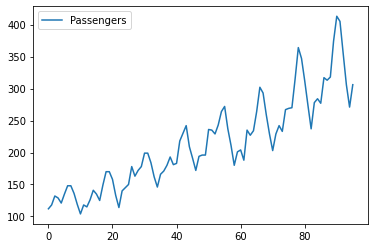

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
serarima.plot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1c42fb950>]],
      dtype=object)

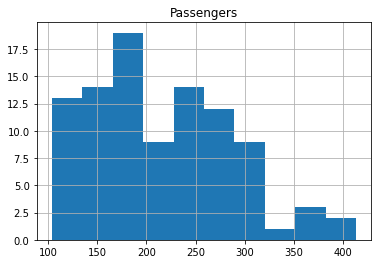

In [ ]:
serarima.hist()

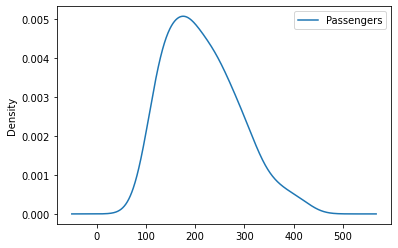

In [ ]:
serarima.plot(kind='kde')

In [ ]:
serarima["Passengers"]=serarima["Passengers"].astype(float)
serarima["Month"] = pd.to_datetime(serarima.Month,format="%b-%y")
arima=serarima["Passengers"]

In [ ]:
# separate out a validation dataset
split_point = len(arima) - 10
dataset, validation = arima[0:split_point], arima[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


Persistence/ Base model

In [ ]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs =test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

ARIMA Hyperparameters

In [ ]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
# load data
train = read_csv('ad.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

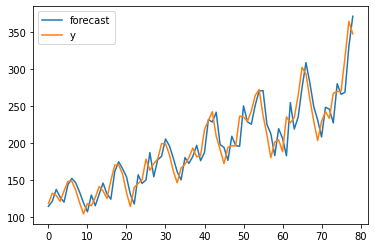

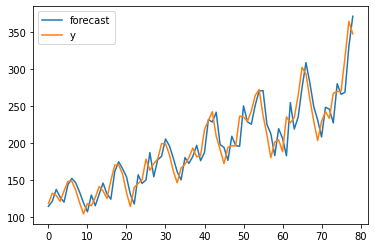

In [ ]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse =sqrt(mean_squared_error(val[1], forecast))
rmse

47.73579334502228

Inference:Data distributio is skewed towards right which means , the mode is less than the median, which is less than the mean.
Comparing the root mean square error,the least rmse 13.5 is obtained with Multiplicative_Additive_seasonal forecasting model. 





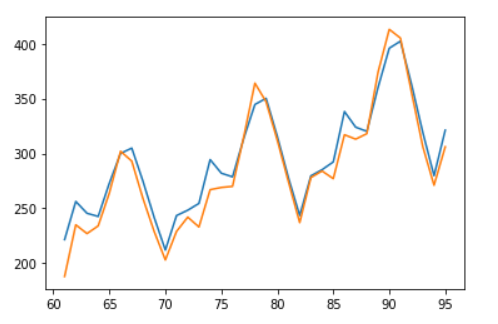